In [8]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "./city_data.csv"
ride_data_to_load = "./ride_data.csv"

# Read the City and Ride Data
cpd = pd.read_csv(city_data_to_load)
rpd = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
crpd = pd.merge(rpd, cpd, on='city')
# Display the data table for preview
crpd.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


# Bubble Plot of Ride Sharing Data

Text(41, 35, 'Note: Circle size correlates with driver count per city')

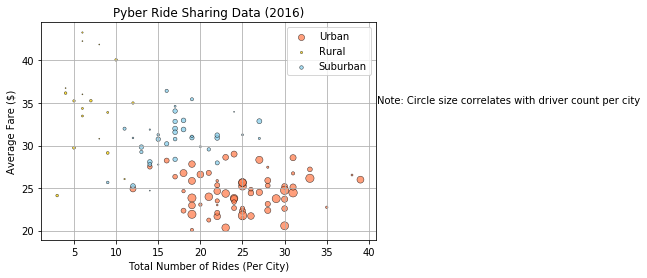

In [19]:
# Obtain the x and y coordinates for each of the three city types
urban_pd = crpd[crpd['type']=='Urban']

gurbanfare_pd = urban_pd.groupby('city').mean()['fare']
gurbantrc_pd = urban_pd.groupby('city').count()['type']
gurbandc_pd = urban_pd.groupby('city').mean()['driver_count']

rural_pd = crpd[crpd['type']=='Rural']
gruralfare_pd = rural_pd.groupby('city').mean()['fare']
gruraltrc_pd = rural_pd.groupby('city').count()['fare']
gruraldc_pd = rural_pd.groupby('city').mean()['driver_count']

suburban_pd = crpd[crpd['type']=='Suburban']
gsuburbanfare_pd = suburban_pd.groupby('city').mean()['fare']
gsuburbantrc_pd = suburban_pd.groupby('city').count()['fare']
gsuburbandc_pd = suburban_pd.groupby('city').mean()['driver_count']


# Build the scatter plots for each city types
plt.scatter(gurbantrc_pd, gurbanfare_pd, c='coral', s=gurbandc_pd, label='Urban', linewidths=.5, alpha=.75, edgecolor='black')
plt.scatter(gruraltrc_pd, gruralfare_pd, c='gold', s=gruraldc_pd, label='Rural', linewidths=.5, alpha=.75, edgecolor='black')
plt.scatter(gsuburbantrc_pd, gsuburbanfare_pd, c='skyblue', s=gsuburbandc_pd, label='Suburban', linewidths=.5, alpha=.75, edgecolor='black')

# Incorporate the other graph properties
plt.grid()
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Create a legend
plt.legend(loc='upper right')

# Incorporate a text label regarding circle size
plt.text(41,35,"Note: Circle size correlates with driver count per city")

# Save Figure
plt.savefig("../Images/PyberData.png")

In [20]:
# Show plot
plt.show()

# Total Fares by City Type

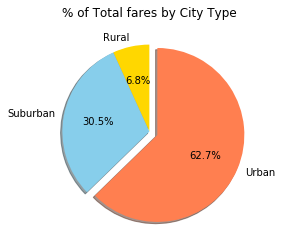

In [31]:
# Calculate Type Percents
tfares = crpd.groupby('type')['fare'].sum()
# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
color = ['gold', 'skyblue',  'coral']
explode = [0, 0, .1]

plt.pie(tfares, explode=explode, labels=labels, colors=color, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("% of Total fares by City Type")
plt.show()

# Save Figure
plt.savefig("../Images/Totalfarespie.png")

# Total Rides by City Type

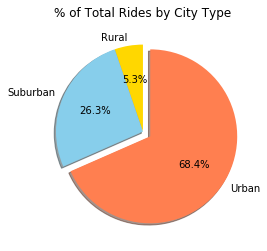

In [29]:
# Calculate Type Percents
trides = crpd.groupby('type')['ride_id'].count()
# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
color = ['gold', 'skyblue',  'coral']
explode = [0, 0, .1]

plt.pie(trides, explode=explode, labels=labels, colors=color, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("% of Total Rides by City Type")
plt.show()

#Save Figure
plt.savefig("../Images/Totalridespie.png")

# Total Drivers by City Type

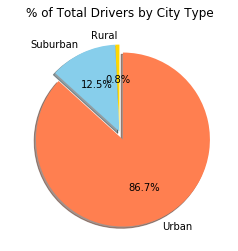

In [34]:
# Calculate Type Percents
tdrivers = crpd.groupby('type')['driver_count'].sum()
# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
color = ['gold', 'skyblue',  'coral']
explode = [0, 0, .1]

plt.pie(tdrivers, explode=explode, labels=labels, colors=color, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("% of Total Drivers by City Type")
plt.show()

#Save figure
plt.savefig("../Images/totaldrivespie.png")